In [58]:
df = pd.DataFrame(
    {
        "aaa": [1, 2, 3],
        "bbb": [4, 5, 6]
    }
)


,aaa,bbb
0,1,4
1,2,5
2,3,6


In [59]:
set(["aaa"]) in set(["aaa", "bbb"])

False

In [ ]:
nm1 = f"feas_tongdun-tongdunHitRuleDetailFeature-408"
nm2 = f"feas_tongdun-tongdunReloanFeature-301"
all_feas_1, feas_cols_v2_upper_1, feas_cols_v2_1 = get_all_feas(f"{nm1}.txt", f"{nm1}.parquet")
all_feas_2, feas_cols_v2_upper_2, feas_cols_v2_2 = get_all_feas(f"{nm2}.txt", f"{nm2}.parquet")
all_feas = pd.concat(
    [
        all_feas_1, 
        all_feas_2[all_feas_2.columns[5:]]
    ],
    axis = 1
)
gc.collect()

In [ ]:
feas_list = []
feas_df = None

In [ ]:
with open("sorted_feas_importance/feas_tongdun-someComb-709-515.txt", "r") as f:
    feas_new = [i.strip().lower() for i in f.readlines()]
    feas_list += feas_new
feas_df = all_feas # .loc[:, feas_new]
feas_df.shape, len(feas_list)

In [ ]:
for fea_list_name in [
    "feas_comb-85-60", "feas_tongdun-tongdunReloanHitRuleDetailFeature-669-176",
    "feas_tongdun-others-297-129", "feas_tongdun-tongdunDeriveFeature-720-234", 
    "feas_bairong-822-345"
]:
    print(fea_list_name) ## 
    tmp_nm = fea_list_name.rsplit("-", 1)[0] ## 得到 feas_comb-85
    all_feas_1, feas_cols_v2_upper_1, feas_cols_v2_1 = get_all_feas(f"{tmp_nm}.txt", f"{tmp_nm}.parquet")
    # print(all_feas_1.shape)
    with open(f"sorted_feas_importance/{fea_list_name}.txt", "r") as f:
        feas_new = [i.strip().lower() for i in f.readlines()]
        feas_list += feas_new
    # print("concating...")
    feas_df = pd.concat([feas_df, all_feas_1.loc[:, feas_new]], axis = 1)

In [ ]:
feas_df.shape, len(feas_list)

In [ ]:
target_label = "target_1d"
y = feas_df[target_label]
train, test = train_test_split(feas_df, test_size=0.25, random_state=30, shuffle=True, stratify=y)

In [ ]:
nm = f"thirdParty_v1-{len(feas_list)}"
nm

In [ ]:
model_path = train_original_model_1(
    train, test, 
    feas_list, 
    f"{nm}-origin", 
    "trained_models",
    "target_1d",
)
model_path

In [55]:
for j in range(10):
    i = 475 - j*30
    print(i)

475
445
415
385
355
325
295
265
235
205


In [1]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
import pandas as pd
import numpy as np
import tqdm, datetime, pickle
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

import ngboost as ngb

from sklearn import datasets

import plotnine
from plotnine import *

import seaborn as sns

import os

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten

# 处理埋点特征列表

In [11]:
with open("/Users/minkexiu/Desktop/dongzhi_v2_features_list.txt", "r") as f:
    feas_cols_v2 = [_.strip() for _ in f.readlines()]

In [13]:
maidian_list = pd.read_csv("/Users/minkexiu/Desktop/feas_maidian.csv")["Feature_Name"].values

In [21]:
maidian_feas = [_.lower() for _ in list(maidian_list[4:])]

In [23]:
len(
    set(maidian_feas).intersection(
        set(feas_cols_v2)
    )
)

484

# 处理行为特征列表

In [6]:
with open("/Users/minkexiu/Desktop/dongzhi_v2_features_list.txt", "r") as f:
    feas_cols_v2 = [_.strip() for _ in f.readlines()]

In [28]:
len(feas_cols_v2)

1678

In [42]:
fea_files_dir = "/Users/minkexiu/Desktop/行为特征/"
for fname in os.listdir(fea_files_dir):
    feas = list(pd.read_csv(os.path.join(fea_files_dir, fname)).iloc[:, 0])
    feas = [_.lower() for _ in feas]
    feas = set(feas)
    itsct = feas.intersection(set(feas_cols_v2))
    print(fname, len(itsct), len(feas))

term4.csv 407 627
term3.csv 0 737
term2.csv 91 115
term1.csv 116 228


In [29]:
407+91+116

614

In [30]:
1098

1098

In [39]:
feas_comb_old = pd.read_csv("/Users/minkexiu/Desktop/第三方特征列表/feas_comb_old-4054.csv")["名称"].apply(lambda x: x.lower()).values
feas_comb_old = list(feas_comb_old)

In [40]:
len(
    set(feas_comb_old).intersection(
        set(feas_cols_v2)
    )
)

548

In [41]:
1098+548

1646

----------

In [44]:
with open("/Users/minkexiu/Desktop/dongzhi_v2_features_list.txt", "r") as f:
    feas_cols_v2 = set([_.strip() for _ in f.readlines()])

In [45]:
fea_files_dir = "/Users/minkexiu/Desktop/行为特征/"
total_terms = []
for fname in os.listdir(fea_files_dir):
    feas = list(pd.read_csv(os.path.join(fea_files_dir, fname)).iloc[:, 0])
    feas = [_.lower() for _ in feas]
    total_terms += feas
total_terms = set(total_terms)

In [46]:
feas_comb_old = pd.read_csv("/Users/minkexiu/Desktop/第三方特征列表/feas_comb_old-4054.csv")["名称"].apply(lambda x: x.lower()).values
feas_comb_old = set(feas_comb_old)

In [47]:
maidian_list = pd.read_csv("/Users/minkexiu/Desktop/feas_maidian.csv")["Feature_Name"].values
maidian_feas = set([_.lower() for _ in list(maidian_list[4:])])

In [50]:
feas_cols_v2 - total_terms - feas_comb_old - maidian_feas

{'loanbillingbehaviorfeature___billingstatisticsfeature_100d___numberofbillingsinexpire',
 'loanbillingbehaviorfeature___billingstatisticsfeature_100d___numberofoverdueprincipal',
 'loanbillingbehaviorfeature___billingstatisticsfeature_150d___numberofbillingsinexpire',
 'loanbillingbehaviorfeature___billingstatisticsfeature_150d___numberofoverdueprincipal',
 'loanbillingbehaviorfeature___billingstatisticsfeature_150d___numberofprincipalinexpire',
 'loanbillingbehaviorfeature___billingstatisticsfeature_200d___numberofoverdueprincipal',
 'loanbillingbehaviorfeature___billingstatisticsfeature_50d___numberofoverdueprincipal',
 'loanbillingbehaviorfeature___billingstatisticsfeature_50d___numberofprincipalinexpire',
 'loanbillingbehaviorfeature___billingstatisticsfeature_50to100d___numberofprincipalinexpire',
 'qianhaifeature___largecredooscore',
 'qianhaifeature___loancredooscore',
 'qianhaimultiloanfeature___amount',
 'qianhaimultiloanfeature___bnkamount',
 'qianhaimultiloanfeature___cnssa

# 处理行为特征列表

In [32]:
feas_aliyun = [
    "描述-阿里云.csv",
    "名称-aliyun.csv",
    "数据源-阿里云.csv",
]

feas_baihang = [
    "描述-百行.csv",
    "名称-baihang.csv",
    "数据源-百行征信.csv",
]

feas_bairong = [
    "名称-bairong.csv",
    "数据源-百融.csv",
]

feas_fulllink = [
    "名称-fulllink.csv",
    "数据源-孚临金科.csv",
    
]

feas_hengzhipuhui = [
    "名称-hengzhipuhui.csv", 
    "数据源-恒指普惠.csv",
]

feas_jiguang = [
    "描述-极光.csv",
    "名称-jiguang.csv",
    "数据源-极光.csv",
]

feas_nifa = [
    "名称-nifa.csv",
    "数据源-中互金.csv",
]

feas_tencent = [
    "名称-tencent.csv",
    "数据源-腾讯云.csv",
]

feas_tongdun = [
    "描述-同盾.csv",
    "名称-tongdun.csv",
    "数据源-同盾.csv",
    "数据源-同盾借款｜异常借款.csv",
]

feas_xinyan = [
    "名称-xinyan.csv",
    "数据源-新颜.csv",
    
]

In [33]:
fea_files_dir = "/Users/minkexiu/Desktop/第三方特征列表/"

In [34]:
import os
def combine_fea_files(l, fdir = "thirdParty_feas_list/"):
    '''
    把l里面的文件读出来，然后合并在一起
    '''
    dfs = []
    for f in l:
        fpath = os.path.join(fdir, f)
        if not dfs:
            dfs.append(pd.read_csv(fpath, "\t"))
        else:
            dfs.append(
                pd.read_csv(fpath, "\t")[dfs[0].columns]
            )
    return pd.concat(dfs)

def combine_fea_files_1(l, new_feaFile_name, fdir = "/Users/minkexiu/Desktop/第三方特征列表/"):
    '''
    把l里面的文件读出来，然后合并在一起
    '''
    
    first_line = None
    all_lines = set()
    for f in l:
        fpath = os.path.join(fdir, f)
        with open(fpath, "r") as fp:
            lines = fp.readlines()
        if not first_line:
            first_line = lines[0].strip()
        for line in lines[1:-1]:
            all_lines.add(line.strip())
    
    columns = first_line.split("\t")
    df_data = [[] for _ in columns]
    
    for line in all_lines:
        for col_num, val in enumerate(line.split("\t")):
            df_data[col_num].append(val)
    
    final_df = pd.DataFrame({k:v for k, v in zip(columns, df_data)})
    final_df.to_csv(
        os.path.join(fdir, new_feaFile_name + f"-{final_df.shape[0]}.csv"),
        index=False
    )
    print(new_feaFile_name, final_df.shape)
    return 

combine_fea_files_1(feas_baihang, "feas_baihang")
combine_fea_files_1(feas_bairong, "feas_bairong")
# combine_fea_files_1(feas_jiguang, "feas_jiguang")
combine_fea_files_1(feas_tongdun, "feas_tongdun")

## 似乎aliyun，fullink，hengzhipuhui，nifa，tencent，xinyan，jiguang目测可以混一起使用。
combine_fea_files_1(
    feas_aliyun + feas_fulllink + feas_hengzhipuhui + feas_nifa + feas_tencent + feas_xinyan + feas_jiguang,
    "feas_comb"
)

feas_baihang (752, 10)
feas_bairong (822, 10)
feas_tongdun (2395, 10)
feas_comb (227, 10)


In [35]:
## dongzhiv2用的所有的第三方特征
combine_fea_files_1(
    feas_nifa + feas_xinyan + feas_tongdun + feas_bairong + feas_baihang, 
    "feas_comb_old"
)

feas_comb_old (4054, 10)


In [13]:
from collections import defaultdict
def process_column_name(filePath):
    df = pd.read_csv(filePath)
    fea_start_part = defaultdict(list)
    for fea_name in df["名称"]:
        fea_start_part[fea_name.split("___")[0]].append(fea_name)
    
    for key in fea_start_part:
        print(key, len(fea_start_part[key]))
    
process_column_name(fea_files_dir + "feas_tongdun-2395.csv")

tongdunHitRuleDetailFeature 408
tongdunReloanHitRuleDetailFeature 669
tongdunFeatureDifference 287
tongdunDeriveFeature 720
tongdunReloanFeature 301
tongdunMultiLoanSubtractMedianFeature 4
tongdun_numberOfLoan_3M 1
ticket_maxNumberOfUserShareOneDeviceDifferentiatedByTongdun 1
ticket_numberOfDeviceDifferentiatedByTongdun 1
tongdun_numberOfLoan_6M 1
tongdun_numberOfLoan_1M 1
tongdun_numberOfLoan_12M 1


In [14]:
tongdun_df = pd.read_csv(fea_files_dir + "feas_tongdun-2395.csv")

In [15]:
startswiths = ["tongdunDeriveFeature", "tongdunReloanHitRuleDetailFeature", "tongdunHitRuleDetailFeature", "tongdunReloanFeature"]
for startswith in startswiths:
    _df = tongdun_df[tongdun_df["名称"].astype(str).apply(lambda x: x.startswith(startswith))]
    _df.to_csv(fea_files_dir + f"feas_tongdun-{startswith}-{_df.shape[0]}.csv")
_df = tongdun_df[tongdun_df["名称"].astype(str).apply(lambda x: x.split("___")[0] not in startswiths)]
_df.to_csv(fea_files_dir + f"feas_tongdun-others-{_df.shape[0]}.csv")

In [16]:
sys_feas = []
for fname in os.listdir(fea_files_dir):
    if not (fname.startswith("feas_") and fname.endswith(".csv")):
        continue
    df = pd.read_csv(os.path.join(fea_files_dir, fname))
    
    tmp_sys_fea = [fea for fea in df["名称"] if fea.startswith("system")]
    sys_feas += tmp_sys_fea
    other_feas = [fea for fea in df["名称"] if not fea.startswith("system")]
    
    print(tmp_sys_fea, len(other_feas))
    
    name = "-".join(fname.split(".")[0].split("-")[:-1])
    
    new_name = f"{name}-{len(other_feas)}.txt"
    print(new_name, "\n")
    with open(os.path.join(fea_files_dir, new_name), "w", encoding="utf-8") as f:
        f.write("\n".join(other_feas))

new_name = f"thrPty-sys-{len(sys_feas)}.txt"
print(new_name)
with open(os.path.join(fea_files_dir, new_name), "w", encoding="utf-8") as f:
    f.write("\n".join(sys_feas))

[] 822
feas_bairong-822.txt 

['system___new_datasource_jiguang_sub_model_score'] 226
feas_comb-226.txt 

[] 408
feas_tongdun-tongdunHitRuleDetailFeature-408.txt 

[] 720
feas_tongdun-tongdunDeriveFeature-720.txt 

[] 301
feas_tongdun-tongdunReloanFeature-301.txt 

['system___new_datasource_baihang_sub_model_score'] 751
feas_baihang-751.txt 

[] 669
feas_tongdun-tongdunReloanHitRuleDetailFeature-669.txt 

[] 297
feas_tongdun-others-297.txt 

thrPty-sys-2.txt


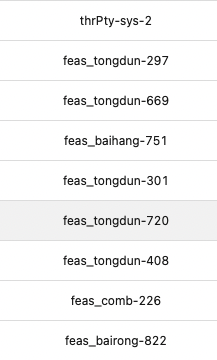


In [24]:
final_list = []
for fname in os.listdir(fea_files_dir):
    if not (fname.endswith(".txt") and fname.startswith("feas_")):
        continue
    fpath = os.path.join(fea_files_dir, fname)
    with open(fpath, "r") as f:
        feas_cols_v2_upper = [i.strip() for i in f.readlines()]
    final_list += feas_cols_v2_upper
    
new_name = "thrPty-nonSys-4194.txt"
with open(os.path.join(fea_files_dir, new_name), "w", encoding="utf-8") as f:
    f.write("\n".join(final_list))

In [21]:
m = np.array([
    
    [
        0.697185,
0.669568,
0.650829,
0.90286,
0.57615,
0.45
    ],
    [
        0.695575,
0.667142,
0.654323,
0.938112,
0.646893,
0.45
    ],
    [
        0.693228,
0.658256,
0.649816,
0.940675,
0.574639,
0.45
    ],
    [
        0.689214,
0.653531,
0.645529,
0.948462,
0.590543,
0.45,
    ],
    [
        0.680041,
0.640843,
0.640576,
0.944018,
0.554699,
0.45,
    ],
    
    [
        0.664595,
0.63499,
0.63173,
0.93189,
0.576103,
0.45,
    ]
])
mt = m.T
mt.argmax(axis=1)

array([0, 0, 1, 3, 1, 0])

In [27]:
m = np.array([
    [
        0.721841,
0.687536,
0.661552,
0.73026,
0.699451,
0.836813,
0.725444,
0.691348,
0.66422,
0.702327,
0.689718,
0.836813,
0.725769,
0.691278,
0.663331,
0.693787,
0.686702,
0.836813,
    ],
    [
        0.727002,
0.689597,
0.668721,
0.741389,
0.729993,
0.834191,
0.731981,
0.693368,
0.67175,
0.709971,
0.719936,
0.834191,
0.732985,
0.693703,
0.672708,
0.701966,
0.717343,
0.834191,
    ],
    [
        0.727825,
0.678922,
0.669,
0.765353,
0.69183,
0.834539,
0.734311,
0.683467,
0.673476,
0.733883,
0.676167,
0.834539,
0.736137,
0.683548,
0.674327,
0.726748,
0.670782,
0.834539,
    ],
    [
        0.725143,
0.6771,
0.663777,
0.774955,
0.70191,
0.845396,
0.73122,
0.68275,
0.669021,
0.742921,
0.687723,
0.845396,
0.732759,
0.683429,
0.670682,
0.736314,
0.683066,
0.845396,
    ],
    [
      0.715962,
0.667221,
0.662794,
0.788443,
0.686522,
0.84189,
0.721265,
0.673536,
0.668911,
0.757035,
0.672315,
0.84189,
0.723742,
0.674278,
0.670529,
0.751974,
0.666635,
0.84189  ,
    ],
    [
        0.6978,
0.661462,
0.652945,
0.802317,
0.704198,
0.837537,
0.7051,
0.668447,
0.659575,
0.770785,
0.690424,
0.837537,
0.70737,
0.669233,
0.661799,
0.765711,
0.684984,
0.837537,
    ],
])
mt = m.T
for i in mt.argmax(axis=1):
    print(i)

2
1
2
5
1
3
2
1
2
5
1
3
2
1
2
5
1
3


In [28]:
m = np.array([
    [
        0.709583,
0.689685,
0.702,
0.618362,
0.613519,
0.45,
        0.72896,
0.735774,
0.700133,
0.626385,
0.652642,
0.45,
    ],
    [
        0.73029,
0.700979,
0.720099,
0.644195,
0.644513,
0.45,
        0.742516,
0.750629,
0.724609,
0.644944,
0.66957,
0.45,
    ],
    [
        0.735157,
0.670963,
0.721434,
0.668106,
0.592933,
0.45,
        0.743747,
0.751123,
0.730095,
0.654619,
0.677057,
0.45,
    ],
    [
        0.742363,
0.66841,
0.724493,
0.685404,
0.599806,
0.45,
        0.743789,
0.752717,
0.733239,
0.667224,
0.688026,
0.45,
    ],
    [
        0.739452,
0.660463,
0.727386,
0.707451,
0.592014,
0.45,
        0.740668,
0.751045,
0.727111,
0.688751,
0.700002,
0.45,
    ],
    [
        0.719169,
0.663832,
0.715317,
0.734526,
0.606094,
0.45,
        0.724846,
0.756548,
0.722307,
0.701217,
0.717138,
0.45,
    ]
])
mt = m.T
for i in mt.argmax(axis=1):
    print(i)

3
1
4
5
1
0
3
5
3
5
5
0


In [ ]:
for 

In [31]:
mapping = {
    "0": "hour",
    "1": "1d",
    "2": "3d",
    "3": "7d",
    "4": "15d",
    "5": "35d",
}
rst = '''0
0
1
3
1
0
2
1
2
5
1
3
2
1
2
5
1
3
2
1
2
5
1
3
3
1
4
5
1
0
3
5
3
5
5
0'''
for i in rst.split("\n"):
    print(mapping[i])

hour
hour
1d
7d
1d
hour
3d
1d
3d
35d
1d
7d
3d
1d
3d
35d
1d
7d
3d
1d
3d
35d
1d
7d
7d
1d
15d
35d
1d
hour
7d
35d
7d
35d
35d
hour


In [11]:
data_train = pd.read_csv("preprocessedDataset/pre1.csv")
numerical_category_fewValues = [
    "homeOwnership", 
    "verificationStatus",
    "initialListStatus",
    "applicationType",
    "n11",
    "n12",
]
numerical_category_manyValues = [
    "regionCode",
    "employmentTitle",
    "purpose",
    "postCode",
    "title",
]
date_type = [
    'issueDate',
    'earliesCreditLine',
    'issueDateDT',
    'earliesCreditLineDT',
    'earliesCreditLineYear',
    'earliesCreditLineMonth',
    'issueYear',
    'issueMonth'
]
numerical_serial = [
    "loanAmnt","interestRate","installment","annualIncome","dti","delinquency_2years","ficoRangeLow","ficoRangeHigh","openAcc",
    "pubRec","pubRecBankruptcies","revolBal","revolUtil","totalAcc","n0","n1","n2","n3",
    "n4","n5","n6","n7","n8","n9","n10","n13","n14",
    "term", 
]
object_serial = [
    "grade",
    "subGrade", 
    "employmentLength"
]

In [12]:
features = [f for f in data_train.columns if f not in ['id', 'isDefault', "policyCode", "issueDate", "earliesCreditLine"] and '_outliers' not in f]
y_full = data_train['isDefault']
x_full = data_train[features]

from sklearn.model_selection import train_test_split

X_, X_test, y_, y_test = train_test_split(x_full, y_full, test_size=0.5, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.6, random_state=0)
del X_, y_

In [13]:
dtrain = xgb.DMatrix(X_train.to_numpy())
dtest = xgb.DMatrix(X_valid.to_numpy())

In [14]:
params={
    'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'scale_pos_weight': 3,
    'learning_rate': 0.1, 
    'reg_lambda': 5,
    'reg_alpha': 0, 
    'colsample_bytree': 0.8,
}
model = xgb.train(params, dtrain, num_boost_round=10000, evals=[(dtrain, 'train'), (dtest, 'test')],
                                                  early_stopping_rounds=50,verbose_eval=200)

XGBoostError: [14:58:50] /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:58: Check failed: preds.Size() == info.labels_.Size() (160000 vs. 0) :  labels are not correctly providedpreds.size=160000, label.size=0, Loss: binary:logistic
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000013479c364 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x00000001348af1ad xgboost::obj::RegLossObj<xgboost::obj::LogisticClassification>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*) + 493
  [bt] (2) 3   libxgboost.dylib                    0x000000013484a5f4 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 612
  [bt] (3) 4   libxgboost.dylib                    0x00000001347a08f7 XGBoosterUpdateOneIter + 151
  [bt] (4) 5   libffi.7.dylib                      0x000000010d449ead ffi_call_unix64 + 85
  [bt] (5) 6   ???                                 0x0000000309d11d80 0x0 + 13049601408



In [1]:
from PIL import Image, ImageDraw

In [2]:
pic1 = Image.open("/Users/minkexiu/Desktop/test.png")

In [3]:
pic1.size

(952, 252)

In [4]:
to_image = Image.new('RGB', (pic1.size[0], pic1.size[1]), color=1) #创建一个新图

In [5]:
draw = ImageDraw.Draw(pic1)

In [6]:
# y = 31
y = 145
draw.line(
    [
        (0, y),
        (pic1.size[0],  y)
    ], 
    fill="red"
)

In [7]:
pic1.show()

In [8]:
107 + 31

138

In [9]:
(138 / 252) * 1.5 + (114 / 252 / 3) * 1.5 * n

NameError: name 'n' is not defined